In [1]:
import sys
sys.path.append('../src_variable')

import network as nw
import torch
import generate_kvadraturen as gk
import bus
import road as rd
import traffic_lights as tl
import junction as jn
import numpy as np

In [22]:
def minimal_kvadraturen(T = 100):
    road1 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                    inflow = 0.1, id="road1fw")
    road2 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                    inflow = 0.1, id="road1bw")
    road3 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                    inflow = 0.1, id="road2fw")
    road4 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                    inflow = 0.1, id="road2bw")
    traffic_light = tl.CoupledTrafficLightContinuous(False, [0], [1], [3], [2], [40.0, 30.0])
    junction = jn.Junction([road1, road2, road3, road4], [0,3], [1,2], [[1.0, 0.0],[0.0, 1.0]], [], [traffic_light])
    network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)
    return network


In [23]:
# Testing minimal example
T = 100
network = minimal_kvadraturen(T)

ids = ["road1fw", "road1bw"]
stops = [("road1bw", 20)]
times = [20]

bus1 = bus.Bus(ids, stops, times, network)

bus_network = nw.RoadNetwork(network.roads, network.junctions, network.T, [bus1], optimizing = False, store_densities = False)

In [24]:
densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()

c:\Users\torje\OneDrive - NTNU\Dokumenter\Semester10\kristiansand\notebooks\../src_variable\network.py:274: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dt = torch.tensor(controlpoint - t)


t = 50.0, bus is allowed to cross the junction
t = 50.0, bus should travel full distance of 0.4603598415851593 meters
t = 50.599998474121094, bus is allowed to cross the junction
t = 50.599998474121094, bus should travel full distance of 7.317626953125 meters
t = 51.19999694824219, bus is allowed to cross the junction
t = 51.19999694824219, bus should travel full distance of 7.461166858673096 meters
t = 51.79999542236328, bus is allowed to cross the junction
t = 51.79999542236328, bus should stop at the busstop
t = 52.399993896484375, bus is at busstop
t = 52.99999237060547, bus is at busstop
t = 53.59999084472656, bus is at busstop
t = 54.199989318847656, bus is at busstop
t = 54.79998779296875, bus is at busstop
t = 55.399986267089844, bus is at busstop
t = 55.99998474121094, bus is at busstop
t = 56.59998321533203, bus is at busstop
t = 57.199981689453125, bus is at busstop
t = 57.79998016357422, bus is at busstop
t = 58.39997863769531, bus is at busstop
t = 58.999977111816406, bus 

In [25]:
print(bus1.lengths)
print(bus1.stop_lengths)


[50, 50]
[70, 200]


In [26]:
t_list = np.linspace(0, 200, 1000)
activation = np.zeros_like(t_list)
for junction in bus_network.junctions:
    for i, t in enumerate(t_list):
        # print(f"t = {t}, activation = {junction.get_activation(t, 'road1fw', 'road1bw')}")
        _, activation[i] = junction.get_activation(t, 'road1fw', 'road1bw')

In [27]:
objective = bus_delays[0][0]
print(objective)

tensor(32.1900, grad_fn=<MaximumBackward0>)


In [28]:
params = [v for road in bus_network.roads for v in road.Vmax] +\
        [t for junction in bus_network.junctions for traffic_light in junction.trafficlights for t in traffic_light.cycle] +\
        [t for junction in bus_network.junctions for traffic_light in junction.coupled_trafficlights for t in traffic_light.cycle]

In [29]:
objective.backward()

In [30]:
for p in params:
    print(p.grad)

tensor(-0.9826)
tensor(-2.6162)
tensor(-0.4003)
tensor(-0.0975)
tensor(1.4933e-18)
tensor(-0.1184)


In [ ]:
prr

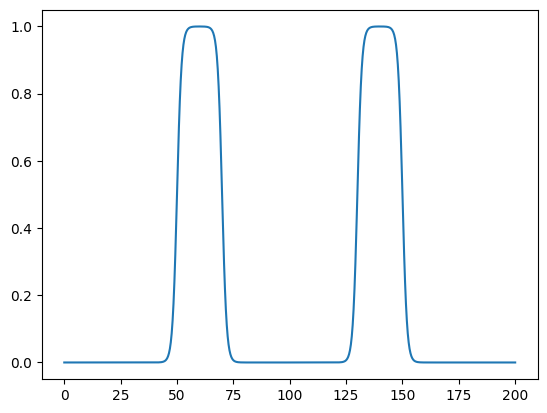

In [7]:
import matplotlib.pyplot as plt
plt.plot(t_list, activation)

In [8]:
lengths = []
times = list(bus_lengths[0].keys())
times_list = []
for t in times:
    lengths.append(float(bus_lengths[0][t]))
    times_list.append(float(t))

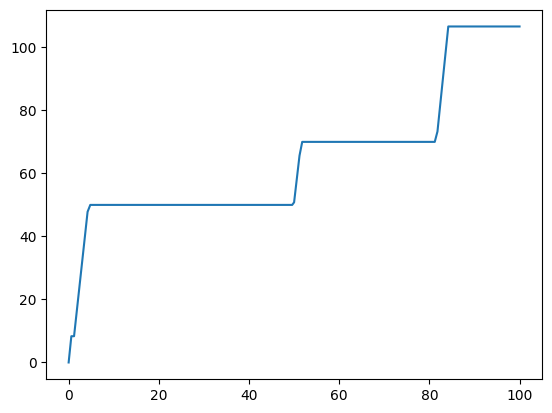

In [9]:
plt.plot(times_list, lengths)


In [10]:
prrr

NameError: name 'prrr' is not defined

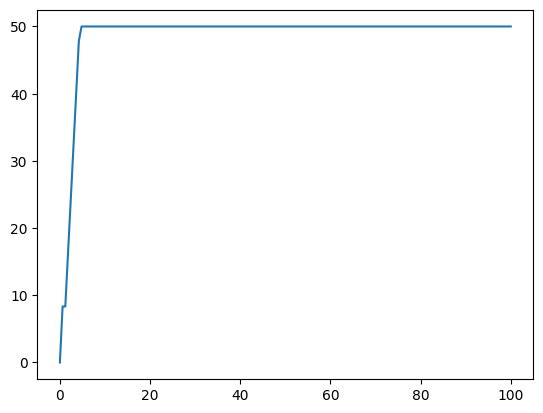

In [2]:
T = 400
network = gk.generate_kvadraturen_small(T)

ids_bw = ["lundsbro_bw", "elvegata_bw", "tollbod_6bw", "tollbod_5bw", "tollbod_4bw", 
        "tollbod_3bw", "tollbod_2bw", "tollbod_1bw", "v_strand_7bw", "v_strand_6bw",
            "v_strand_5bw", "v_strand_4bw", "v_strand_3bw", "v_strand_2bw", "v_strand_1bw"]            
            

stops_bw = [("tollbod_6bw", 50), ("tollbod_3bw", 90), ("tollbod_1bw", 30), ("v_strand_3bw", 25)]
times_bw = [40, 130, 190, 250]
bus_bw = bus.Bus(ids_bw, stops_bw, times_bw, network)

ids_fw = ["v_strand_1fw", "v_strand_2fw", "v_strand_3fw", "h_w_2", "h_w_3",
    "h_w_4", "festning_4fw", "festning_5fw", "festning_6fw", "festning_7fw",
    "tollbod_4fw", "tollbod_5fw", "tollbod_6fw", "elvegata_fw", "lundsbro_fw"]

stops_fw = [("h_w_3", 30), ("festning_5fw", 40), ("tollbod_4fw", 25), 
            ("tollbod_6fw", 60)]
times_fw = [50, 110, 130, 230]
bus_fw = bus.Bus(ids_fw, stops_fw, times_fw, network)

In [3]:
# Create actual network
roads = network.roads
junctions = network.junctions
T = network.T
# Don't store the densities 
bus_network = nw.RoadNetwork(roads, junctions, T, [bus_fw, bus_bw], store_densities = False)

In [4]:
densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()

c:\Users\torje\OneDrive - NTNU\Dokumenter\Semester10\kristiansand\notebooks\../src_variable\network.py:274: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dt = torch.tensor(controlpoint - t)


In [5]:
print(bus_delays)

{0: [tensor(0., grad_fn=<MaximumBackward0>), tensor(0., grad_fn=<MaximumBackward0>), tensor(58.6459, grad_fn=<MaximumBackward0>), tensor(17.1140, grad_fn=<MaximumBackward0>)], 1: [tensor(0., grad_fn=<MaximumBackward0>), tensor(0., grad_fn=<MaximumBackward0>), tensor(0., grad_fn=<MaximumBackward0>), tensor(117.3570, grad_fn=<MaximumBackward0>)]}


In [6]:
objective = bus_delays[0][2] + bus_delays[0][3]
print(objective)

tensor(75.7599, grad_fn=<AddBackward0>)


In [7]:
params = [v for road in bus_network.roads for v in road.Vmax] +\
        [t for junction in bus_network.junctions for traffic_light in junction.trafficlights for t in traffic_light.cycle] +\
        [t for junction in bus_network.junctions for traffic_light in junction.coupled_trafficlights for t in traffic_light.cycle]

In [8]:
print(params)

[tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.33

In [9]:
torch.autograd.set_detect_anomaly(True)
objective.backward()

c:\Users\torje\anaconda3\envs\traffic\lib\site-packages\torch\autograd\__init__.py:200: UserWarning: Error detected in MulBackward0. No forward pass information available. Enable detect anomaly during forward pass for more information. (Triggered internally at ..\torch\csrc\autograd\python_anomaly_mode.cpp:97.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [2]], which is output 0 of AsStridedBackward0, is at version 5; expected version 4 instead. Hint: the backtrace further above shows the operation that failed to compute its gradient. The variable in question was changed in there or anywhere later. Good luck!

In [10]:
print("Road Vmax gradients:")
for road in bus_network.roads:
    for v in road.Vmax:
        print(v.grad)

Road Vmax gradients:
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
for junction in bus_network.junctions:
    for traffic_light in junction.trafficlights:
        for t in traffic_light.cycle:
            print(t.grad)

    for traffic_light in junction.coupled_trafficlights:
        for t in traffic_light.cycle:
            print(t.grad)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
for p in params:
    print(p.grad)

tensor(-2.4659e-15)
tensor(-3.9577e-12)
tensor(-3.9602e-12)
tensor(-7.9203e-12)
tensor(-1.5841e-11)
tensor(-3.1681e-11)
tensor(-6.3363e-11)
tensor(-1.2673e-10)
tensor(-2.5345e-10)
tensor(-5.0690e-10)
tensor(-1.0138e-09)
tensor(-2.0276e-09)
tensor(-4.0552e-09)
tensor(-8.1104e-09)
tensor(-1.6221e-08)
tensor(-3.2442e-08)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(-1.7360)
tensor(-1.4400)
tensor(-0.8480)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(-6.4883e-08)
tensor(-1.2977e-07)
tensor(-2.5953e-07)
tensor(-5.1907e-07)
tensor(-1.0381e-06)
tensor(-2.0763e-06)
tensor(-4.1525e-06)
tensor(-8.3051e-06)
tensor(-1.6610e-05)
tensor(-3.3220e-05)
tensor(-6.6441e-05)
tensor(-0.0001)
tensor(-3.3096e-07)
tensor(-0.0003)
tensor(-0.0005)
tensor(-0.0011)
tensor(-5.2954e-06)
tensor(-0.0021)
tensor(-0.0523)
tensor(-0.0085)
tensor(-0.0171)
tensor(-0.0341)
tensor(-0.0683)
tensor(-0.1366)
tensor(-2.1185)
tensor(-0.4109)
tensor(-0.8217)
tensor(-1.6435)


In [ ]:
derivative,_ = torch.autograd.grad(objective, params[0], allow_unused=True, retain_graph=True)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
print(derivative)

(tensor(-1.2329e-15),)
